In [62]:
%pip install pandas_datareader
import pandas_datareader as pdr
import pandas as pd


Note: you may need to restart the kernel to use updated packages.


In [63]:
# df=df = pd.read_csv("NSE-TATAGLOBAL.csv")

# key='87f1826b1bfccae22202e680fbc72855fcacb2e9'
# df= pdr.get_data_tiingo('NSE-TATAGLOBAL',api_key=key)



In [64]:
# df.to_csv('NSE-TATAGLOBAL.csv')

In [65]:
tata1= pd.read_csv("NSE-TATAGLOBAL.csv")
tata1.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [66]:
tata2=tata1.reset_index()['Close']
tata2.shape

(2035,)

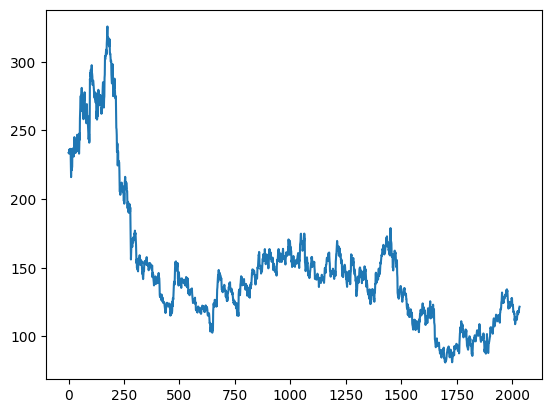

In [67]:
import matplotlib.pyplot as plt
plt.plot(tata2)


In [68]:
import numpy as np

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
tata2=scaler.fit_transform(np.array(tata2).reshape(-1,1))

In [95]:
print(tata2)


[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [71]:
# from sklearn.model_selection import train_test_split
# train,test=train_test_split(tata2,test_size=0.3)

In [72]:
train_size=int(len(tata2)*0.65)
test_size=len(tata2)-train_size
train_data,test_data=tata2[0:train_size,:],tata2[train_size:len(tata2),:1]

In [73]:
train_size,test_size

(1322, 713)

In [74]:
import numpy as np
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range (len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [75]:
#reshape into X=t,t+1,t+2,t+3 amd Y=t+4

time_step=100
X_train,Y_train =create_dataset(train_data,time_step)
x_test,Y_test=create_dataset(test_data,time_step)

In [76]:
print(X_train)

[[0.62418301 0.62214052 0.62622549 ... 0.83455882 0.86213235 0.85273693]
 [0.62214052 0.62622549 0.63378268 ... 0.86213235 0.85273693 0.87111928]
 [0.62622549 0.63378268 0.62234477 ... 0.85273693 0.87111928 0.84497549]
 ...
 [0.34517974 0.31781046 0.33047386 ... 0.2816585  0.27001634 0.26531863]
 [0.31781046 0.33047386 0.32128268 ... 0.27001634 0.26531863 0.27389706]
 [0.33047386 0.32128268 0.34007353 ... 0.26531863 0.27389706 0.25347222]]


In [77]:
print(x_test.shape,Y_test.shape)
print(X_train.shape,Y_train.shape)

(612, 100) (612,)
(1221, 100) (1221,)


In [78]:
# reshape input to be [sample ,timesteps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [79]:
## create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [80]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model.fit(X_train,Y_train,validation_data=(x_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 16s 411ms/step - loss: 0.0280 - val_loss: 0.0058
Epoch 2/100
20/20 [==============================] - 3s 161ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 3/100
20/20 [==============================] - 3s 159ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 3s 167ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 5/100
20/20 [==============================] - 3s 164ms/step - loss: 0.0020 - val_loss: 9.7455e-04
Epoch 6/100
20/20 [==============================] - 3s 162ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 7/100
20/20 [==============================] - 3s 166ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 3s 161ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 3s 161ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 3s 162ms/step - loss: 0.0013 - v

In [83]:
##lets do the prediction and check perfofrmance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(x_test)

20/20 [==============================] - 1s 25ms/step


In [91]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [85]:
## calculate the MSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

163.42138844602655

In [86]:
##test data RSE
math.sqrt(mean_squared_error(Y_test,test_predict))

115.18930744692926

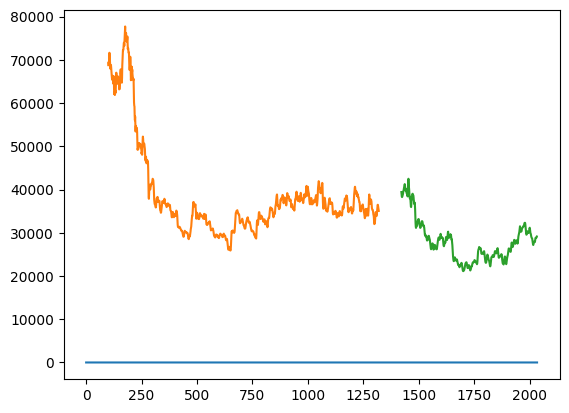

In [98]:
##plotting
# shift train prediction for plotting 
import numpy as np
look_back=100
trainpredict_plot= np.empty_like(tata2)
trainpredict_plot[:,:]=np.nan
trainpredict_plot[look_back :len(train_predict)+look_back,:]=train_predict

# shift test predictions for plotting 
testpredict_plot=np.empty_like(tata2)
testpredict_plot[:,:]=np.nan
testpredict_plot[len(train_predict)+(look_back*2)+  1:len(tata2)-1,:]=test_predict

#plot baseline and prediction
plt.plot(scaler.inverse_transform(tata2))
plt.plot(trainpredict_plot)
plt.plot(testpredict_plot)
plt.show()